### Market Basket Analysis

#### 1. Association Rule
- Itemset : $I =\{i_1, i_2, \dots, i_m\} = \{milk, bread, butter, syrup, eggs, cereal, jam\}$
- Datebase: $D$ respresents a set of database transacitons
- Transaction: $T = \{t_1, t_2, \dots, t_n\}$, for exmaple $t_1 = \{milk, bread, butter\}$

An ``Association Rule`` is defined as an implication of the form (antecedent and consequent):
$$X \Rightarrow Y, \text{ where } X \subset I, Y \subset I \text{ and } A \cap B = 0$$
For example $\{milk, bread\} \Rightarrow \{eggs\}$

``Support`` (range $[0, 1]$) is an indication of how frequently the item set appears in the dataset:
$$supp(X \Rightarrow Y) = \frac{|X \cup Y|}{n}$$
i.e., it is the number of transactions with both $X$ and $Y$ divided by the total number of transactions.

``Confidence`` (range $[0, 1]$): for a rule $X \Rightarrow Y$, confidence shows the percentage in which $Y$ is bought with $X$, which is an indication of how often the rule has been found to be true.
$$confidence(X \Rightarrow Y) = \frac{supp(X \cup Y)}{supp(X)}$$

Rules that satisfy both a minimum support threshold (called ``min sup``) and a minimum confidence threshold (called ``min conf`` ) are called __Strong__.

``Lift`` (range $[0, \infty]$) gives the rise in the probability of having $\{Y\}$ on the cart with the knowlede of $\{X\}$ being present over the probability of having $\{Y\}$ on the cart without knowlede about presence of $\{X\}$, which is defined as
$$lift(X \Rightarrow Y) = \frac{supp(X \cup Y)}{supp(X) \times supp(Y)}$$

``Leverage`` or ``Piatetsky-Snapiro`` (range $[-1, 1]$) computes the difference between the observed frequency of $X$ and $Y$ appearing together and the frequency that we would expect if $X$ and $Y$ are independent.
$$Leverage(X \Rightarrow Y) = supp(X \Rightarrow Y) - supp(X) \times supp(Y)$$

``Conviction`` (range $[0, \infty]$) is the ratio of the expected frequency that $X$ occurs without $Y$ if $X$ and $Y$ were independent divided by the observed frequency of incorrect predictions. A high value means that the consequent depends strongly on the antecedent.
$$cov(X \Rightarrow Y) = \frac{1- supp(Y)}{1 - conf(X \Rightarrow Y)}$$

#### 2. Apriori Algoritm

- Define the minimum support and confidence for the association rule.
- Find out all the subsets in the transactions with higher support(sup) than the minimum support.
- Find all the rules for these subsets with higher confidence than minimum confidence.
- Sort these association rules in decreasing order.
- Analyze the rules along with their confidence and support.

In [1]:
import pandas as pd
import numpy as np
#from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth

##### 2.1 Load Data and Get the List of Items in Every Transaction

In [2]:
data = pd.read_csv("data/Market_Basket_Optimization.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
trans = []
for i in range(data.shape[0]):
    trans.append([str(data.values[i, j]) for j in range(data.shape[1])])
trans = np.array(trans)
print(trans.shape)
print("Number of distinct items:", len(np.unique(trans.flatten())))

(7501, 20)
Number of distinct items: 121


The ``TransactionEncoder()`` is an encoder class for transaction data in Python list.It finds out what are all the different products in the transactions and will __assign each transaction a list which contains a boolean array__ where each index represents whether the corresponding product is purchased in the transaction or not i.e. ``True`` or ``False``.

In [4]:
# TransactionEncoder
te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns=te.columns_, dtype=int)

# Remove column with nan as the column name
data.drop('nan', axis=1, inplace=True)

# Convert data to boolean type
data = data.astype(bool)
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


#### 2.2 Data Visualization

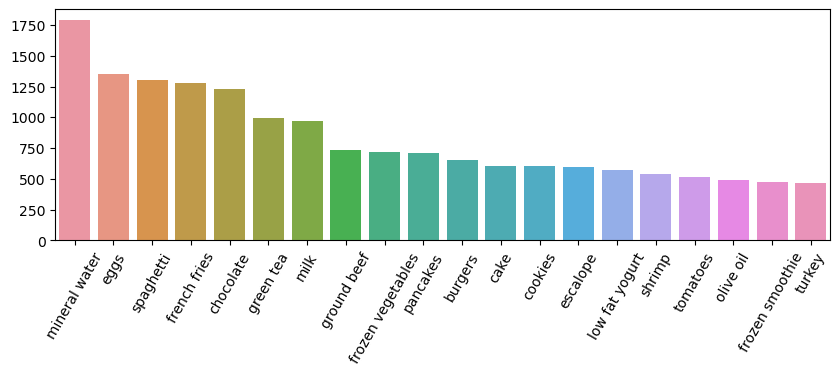

In [5]:
# Plot the top 20 frequently purchased items
top_20 = data.sum(axis=0).sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 3))
s = sns.barplot(x = top_20.index, y = top_20.values)
s.set_xticklabels(s.get_xticklabels(), rotation=60)
plt.show()

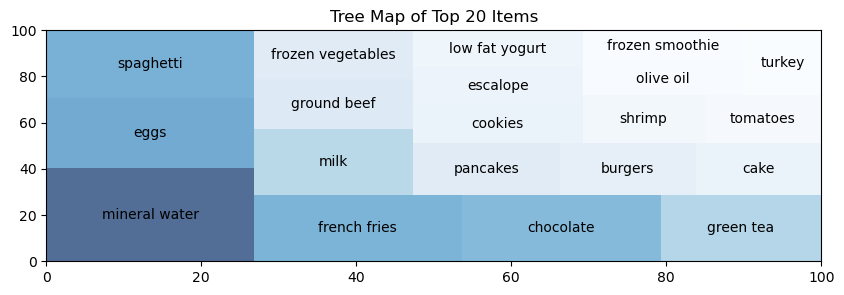

In [6]:
# Create a color palette
item_values = top_20.values
cmap = matplotlib.cm.Blues
norm = matplotlib.colors.Normalize(vmin=min(item_values), vmax=max(item_values))
colors = [cmap(norm(value)) for value in item_values]

# Heatmap of top 20 frequently purchased items
plt.figure(figsize=(10,3))
squarify.plot(sizes=top_20.values, label=top_20.index, alpha=0.7, color=colors)
plt.title("Tree Map of Top 20 Items")
plt.show()

#### 2.3 Apriori

There are 27 frequent itemset of different lengths.

In [7]:
# Set the minimum support as 5% and return frequent itemsets
freq_items_apriori = apriori(data, min_support=0.05, use_colnames=True)
freq_items_apriori.sort_values(by="support", ascending=False).reset_index(drop=True)

,support,itemsets
0,0.238368,(mineral water)
1,0.179709,(eggs)
2,0.174110,(spaghetti)
3,0.170911,(french fries)
4,0.163845,(chocolate)
5,0.132116,(green tea)
6,0.129583,(milk)
7,0.098254,(ground beef)
8,0.095321,(frozen vegetables)
9,0.095054,(pancakes)


- 22% of transactions containing __mineral water__ also contain __chocolate__
- 32% of transactions containing __chocolate__ also contain __mineral water__
- 21% of transactions containing __mineral water__ contain __eggs__
- 28% of transactions containing __eggs__ contain __mineral water__
- 25% of transactions containing __mineral water__ contain __spaghetti__
- 34% of transactions containing __spaghetti__ contain __mineral water__

There is more chance of the transaction {spaghetti,mineral water} than {chocolate,mineral water} as we can find the interesting nature of rule by comparing lift,leverage and conviction of {spaghetti,mineral water} and {chocolate,mineral water}.

A rule is said to be interesting if it is unexpected(suprising to user) and/or actionable(user can do something with it). It's a subjective measure.

In [8]:
# Generate association rules
association_results_apriori = association_rules(freq_items_apriori, metric="lift", min_threshold=1)
association_results_apriori

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
3,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437


In [9]:
freq_items_apriori["length"] = freq_items_apriori["itemsets"].apply(lambda x: len(x))
freq_items_apriori.sort_values(by="length", ascending=False).reset_index(drop=True).head()

,support,itemsets,length
0,0.059725,"(mineral water, spaghetti)",2
1,0.050927,"(eggs, mineral water)",2
2,0.052660,"(mineral water, chocolate)",2
3,0.081056,(cake),1
4,0.058526,(whole wheat rice),1


#### 2.4 Frequent Pattern Growth

In [10]:
freq_items_fpgrowth = fpgrowth(data, min_support=0.05, use_colnames=True)
freq_items_fpgrowth

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.179709,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


In [11]:
association_results_fpgrowth = association_rules(freq_items_fpgrowth, metric="lift", min_threshold=1)
association_results_fpgrowth

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
1,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
2,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
4,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
5,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965


#### 2.5 Apriori Vs FP Growth
Since FP-Growth doesn't require creating candidate sets explicitly, it can be magnitudes faster than the alternative Apriori algorithm. FP-Growth is about 5 times faster.

In [12]:
import time
min_supp_list = [0.01, 0.02, 0.03, 0.04, 0.05]
t_apriori = []
for i in min_supp_list:
    t1 = time.time()
    apriori(data, min_support=i, use_colnames=True)
    t2  = time.time()
    t_apriori.append(1000*(t2-t1))

t_fpgrowth = []
for i in min_supp_list:
    t3 = time.time()
    fpgrowth(data, min_support=i, use_colnames=True)
    t4  = time.time()
    t_fpgrowth.append(1000*(t4-t3))

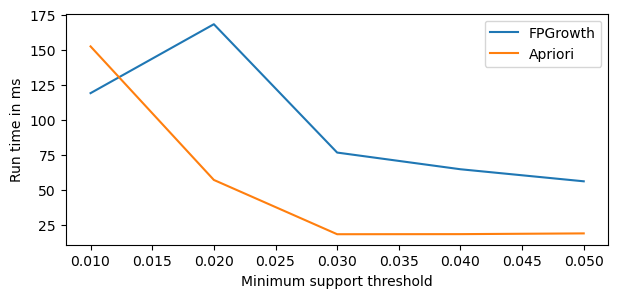

In [13]:
plt.figure(figsize=(7,3))
sns.lineplot(x=min_supp_list, y=t_fpgrowth, label="FPGrowth")
sns.lineplot(x=min_supp_list, y=t_apriori, label="Apriori")
plt.xlabel("Minimum support threshold")
plt.ylabel("Run time in ms")
plt.show()

- Key Insights: Highlight the most interesting and valuable insights from the analysis. For example, identify frequently occurring item combinations and explain their significance in terms of customer behavior or product placement.

- Cross-Selling Opportunities: Identify items that have a high lift or confidence and propose potential cross-selling opportunities. For instance, if customers often buy bread and eggs together, suggest placing these items closer to each other or running promotions on them.

- Product Placement and Assortment Optimization: Use the analysis to guide product placement decisions. Recommend grouping items that have strong associations in the store layout to encourage customers to purchase them together.

- Seasonal or Trend Analysis: Explore if the association rules change during specific seasons or due to the introduction of new products. This information can help stakeholders understand customer preferences and adjust marketing strategies accordingly.

- Visualizations: Utilize visual representations such as graphs, charts, or heatmaps to illustrate the relationships and patterns uncovered. This can make it easier for stakeholders to grasp the insights quickly.

- Actionable Recommendations: Based on the insights gained, provide clear and actionable recommendations to the stakeholders. These recommendations should be specific and tailored to their objectives, such as optimizing product placement, running targeted promotions, or refining assortment strategies.